
Tarea Semana 8 - Métodos Computacionales 1


Punto 1.1.1:



100%|██████████| 10/10 [00:18<00:00,  1.87s/it]


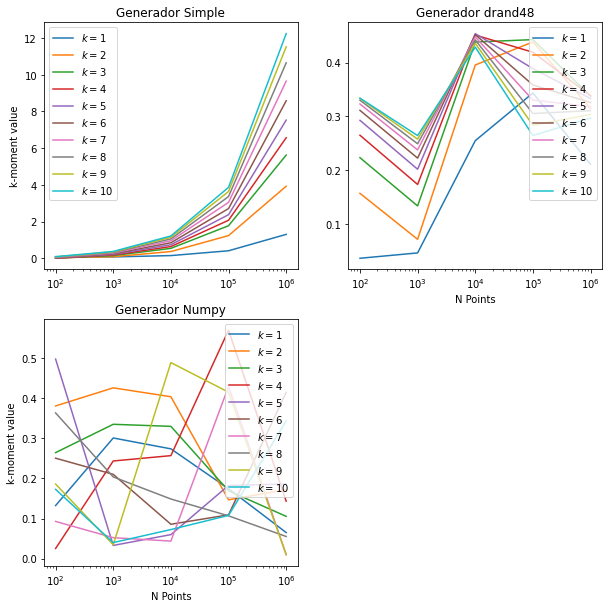



Punto 1.1.2:



100%|██████████| 10000/10000 [00:00<00:00, 771408.81it/s]


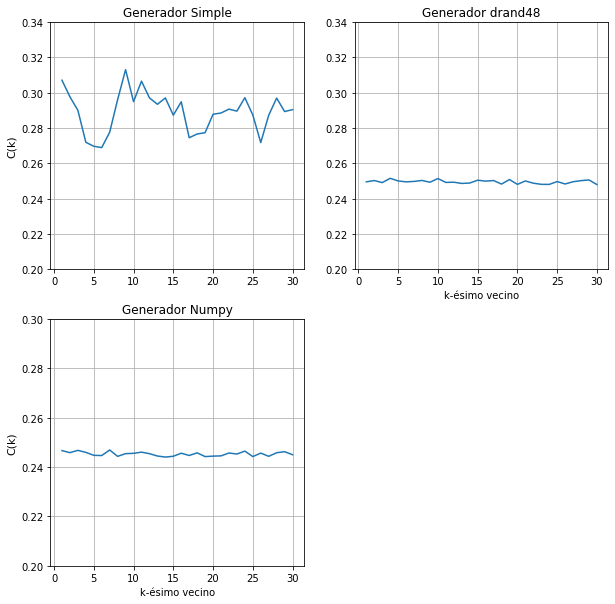



Punto 2.1.1:

w = 1.0


  1%|          | 656/100000 [00:02<06:58, 237.34it/s]


w = 1.1


  1%|          | 550/100000 [00:02<06:58, 237.50it/s]


w = 1.2


  0%|          | 460/100000 [00:01<07:06, 233.34it/s]


w = 1.3


  0%|          | 382/100000 [00:01<08:09, 203.70it/s]


w = 1.4


  0%|          | 314/100000 [00:01<07:56, 209.15it/s]


w = 1.5


  0%|          | 252/100000 [00:01<07:24, 224.48it/s]


w = 1.6


  0%|          | 197/100000 [00:00<07:56, 209.62it/s]


w = 1.7


  0%|          | 145/100000 [00:00<07:51, 211.87it/s]


w = 1.8


  0%|          | 94/100000 [00:00<07:09, 232.41it/s]


w = 1.9


  0%|          | 42/100000 [00:00<09:15, 179.97it/s]


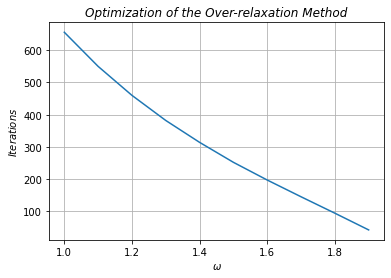

Si omega es mayor o igual a 2, el método diverge



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

print('\nTarea Semaa 8 - Métodos Computacionales 1')


# Punto 1.1.1
print('\n\nPunto 1.1.1:\n')

class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )
    

def numpyTestMethod(Npoints, moment):

    array = np.random.rand(Npoints)
    array = np.random.random_sample(Npoints)

    return np.sqrt(Npoints)* np.abs( np.mean(array**moment) - 1./(1.+moment) )


def FillPoints(seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method = method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random()
        
    return points



rand1 = MyRandom(seed = 16, method='simple')
rand2 = MyRandom(seed = 96, method='drand48')

Points = np.logspace(2,6,5)

NMoments = 10

Moments1 = []
Moments2 = []
Moments3 = []

for k in tqdm(range(NMoments)):
    
    test1 = []
    test2 = []
    test3 = []
    
    for i in range(len(Points)):
        test1.append(rand1.TestMethod(int(Points[i]),k+1,16,'simple'))
        test2.append(rand2.TestMethod(int(Points[i]),k+1,96,'drand48'))
        test3.append(numpyTestMethod(int(Points[i]), k+1))
        
    Moments1.append(test1)
    Moments2.append(test2)
    Moments3.append(test3)


labelk = []
for i in range(NMoments):
    labelk.append(i+1)

fig = plt.figure( figsize=(10,10) )

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

for i in range(NMoments):
    ax1.plot(Points,Moments1[i], label=r'$k=%.0f$' %(labelk[i]))
    ax2.plot(Points,Moments2[i], label=r'$k=%.0f$' %(labelk[i]))
    ax3.plot(Points,Moments3[i], label=r'$k=%.0f$' %(labelk[i]))

ax1.set_title('Generador Simple', fontsize = 12)
ax1.set_xscale('log')
#ax1.set_xlabel('N Points')
ax1.set_ylabel('k-moment value', fontsize = 10)

ax2.set_title('Generador drand48', fontsize = 12)
ax2.set_xscale('log')
ax2.set_xlabel('N Points', fontsize = 10)

ax3.set_title('Generador Numpy', fontsize = 12)
ax3.set_ylabel('k-moment value', fontsize = 10)
ax3.set_xscale('log')
ax3.set_xlabel('N Points', fontsize = 10)

ax1.legend(loc=0)
ax2.legend(loc=1)
ax3.legend(loc=1)

plt.show()




# Punto 1.1.2
print('\n\nPunto 1.1.2:\n')   
k = 30
N = int(1e4)

def getCorrelacion(k, array):
    N = len(array)
    suma = 0 
    for i in range(N-k):
        suma += array[i]*array[i+k]
    return suma/N

Nsimple = FillPoints(165, 'simple', N)
Nrand48 = FillPoints(695, 'drand48', N)
arrayNumpy = np.random.rand(N)

correlaciones1 = np.zeros(k)
correlaciones2 = np.zeros(k)
correlaciones3 = np.zeros(k)

posicion = [x for x in range(1,k+1)]

for i in range(k):
    correlaciones1[i] = getCorrelacion(i+1, Nsimple)
    correlaciones2[i] = getCorrelacion(i+1, Nrand48)
    correlaciones3[i] = getCorrelacion(i+1, arrayNumpy)
    

fig = plt.figure( figsize=(10,10) )

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.plot(posicion, correlaciones1)
ax1.set_title('Generador Simple', fontsize = 12)
#ax1.set_xlabel('k-ésimo vecino')
ax1.set_ylabel('C(k)', fontsize = 11)
ax1.set_ylim(0.2, 0.34)
ax1.grid()

ax2.plot(posicion, correlaciones2)
ax2.set_title('Generador drand48', fontsize = 12)
ax2.set_xlabel('k-ésimo vecino')
#ax2.set_ylabel('C(k)', fontsize = 11)
ax2.set_ylim(0.2, 0.34)
ax2.grid()

ax3.plot(posicion, correlaciones3)
ax3.set_title('Generador Numpy', fontsize = 12)
ax3.set_xlabel('k-ésimo vecino')
ax3.set_ylabel('C(k)', fontsize = 11)
ax3.set_ylim(0.2, 0.3)
ax3.grid()

plt.show()






# Punto 2.1.1
print('\n\nPunto 2.1.1:\n')

# Discretizamos el espacio
Xmin, Xmax, NpointsX = 0.,40.,41
Ymin, Ymax, NpointsY = 0.,40.,41

x = np.linspace(Xmin,Xmax,NpointsX)
y = np.linspace(Xmin,Xmax,NpointsY)


def h1(y):  
    return 75.

def h2(y):
    return 50.

def h3(x):
    return 100.

def h4(x):
    return 10.

def InitT():
    
    T = np.zeros( (NpointsX,NpointsY) )
    
    # Fijando las fronteras
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T


def GetRelaxation(omega, Nit = int(1e5), tolerancia = 1e-2):
    
    T = InitT()
    itmax = 0
    print(f'w = {round(omega,1)}')

    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
                r = (tmp - T[i,j]) # Calculo la distancia entre j y j-1
                
                T[i,j] += omega*r # Actualizar la matriz
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
            
    return itmax


muestra = 10
omegas = np.linspace(1, 1.9, muestra)
iteraciones = []
    
for omega in omegas:
    it = GetRelaxation(omega)
    iteraciones.append(it)
iteraciones = np.array(iteraciones)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(omegas, iteraciones)
ax.set_xlabel(r'$\omega$',fontsize=10)
ax.set_ylabel(r'$Iterations$',fontsize=10)
ax.set_title(r'Optimization of the Over-relaxation Method', style='italic')
plt.grid()
plt.show()

print('Si omega es mayor o igual a 2, el método diverge\n')
